In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/bhavya/Downloads/datasets/pcos_dataset.csv')
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [3]:
df.shape

(1000, 6)

In [5]:
# df.drop_duplicates(inplace=True) -> no duplicates found
# df.shape
# pd.isnull(df).sum() -> no null values found

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [5]:
df['patient_id'] = range(1, len(df) + 1)  # adding a patient id column
df.set_index('patient_id', inplace=True)  # Setting it as the index

In [6]:
df.sample(5)

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
patient_id,,,,,,
904,20,23.5,0,63.7,11,0
643,43,34.0,1,56.6,27,1
167,40,27.2,1,86.5,28,1
318,24,18.2,1,71.7,19,0
66,37,28.1,1,56.7,12,1


In [7]:
df = df.rename(columns = {'Testosterone_Level(ng/dL)' : 'Testosterone_Level'})

In [8]:
# converting cleaned dataset into another CSV file for SQL analysis in BigQuery
# df.to_csv('cleaned_pcos.csv', index=True)

# logistic regression model

In [8]:
# importing libraries to build a logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# data pre processing
# Defining features (X) and target variable (y)
X = df.drop(columns=["PCOS_Diagnosis"])
y = df["PCOS_Diagnosis"]

# splitting into train and test sets (80% train, 20% test)
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,  stratify=y, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# training the Logisitic Rgression model
# Initialize and train model
logreg = LogisticRegression() #Initializes the model.
logreg.fit(X_train, y_train) # Trains the model using the training data.

# Make predictions
y_pred = logreg.predict(X_test) # Predicts PCOS (1) or No PCOS (0) for the test data.
#The model learns patterns from X_train, y_train and applies them to unseen X_test

Accuracy: 0.92


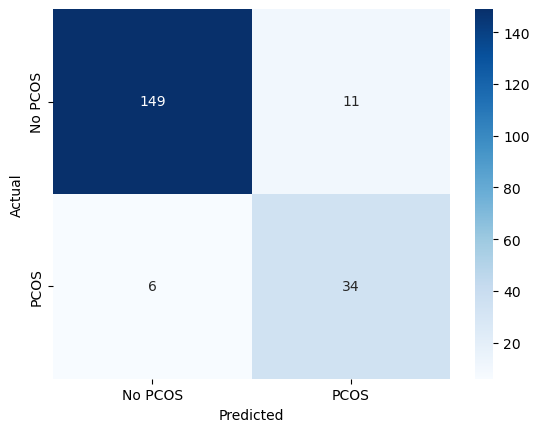

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       160
           1       0.76      0.85      0.80        40

    accuracy                           0.92       200
   macro avg       0.86      0.89      0.87       200
weighted avg       0.92      0.92      0.92       200



In [11]:
# evaluating the model performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No PCOS", "PCOS"], 
            yticklabels=["No PCOS", "PCOS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Random forest model

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# initializing the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# training the random forest model
rf_model.fit(X_train, y_train)

# making predictions
y_pred = rf_model.predict(X_test)

accuracy = 1.0


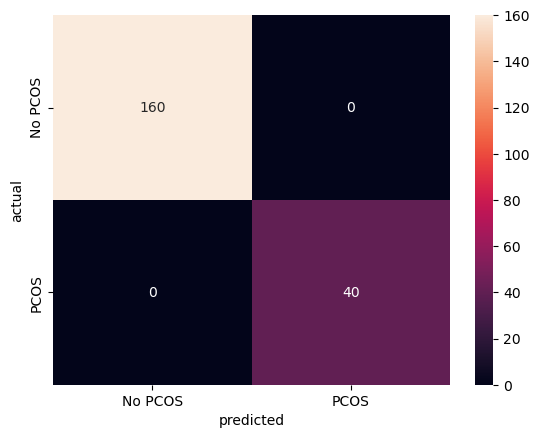

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [14]:
# evaluating model performance
# calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy = {accuracy}")

# plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt = 'd', xticklabels = ['No PCOS','PCOS'], yticklabels = ['No PCOS','PCOS'])
# fmt displays integer values (whole numbers) inside the heatmap.
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

#classification report
print(classification_report(y_test, y_pred))

computing training and test accuracy

In [15]:
# Training accuracy
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 1.00


there seems to be no overfitting in this data and the model is well generalised.
Now, checking with cross validation

In [16]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-validation scores: [1.    1.    0.995 0.995 1.   ]
Mean CV Accuracy: 1.00


the cross validation accuracy = test accuracy. hence it can be assumed that the model is generalising well.

now, checking for data leakage

In [17]:
# Compute correlation matrix
corr_matrix = df.corr()

# Sort correlations with the target variable (PCOS_Diagnosis)
corr_with_target = corr_matrix["PCOS_Diagnosis"].sort_values(ascending=False)
print(corr_with_target)

PCOS_Diagnosis            1.000000
Menstrual_Irregularity    0.469376
BMI                       0.377852
Testosterone_Level        0.200817
Antral_Follicle_Count     0.192014
Age                      -0.064675
Name: PCOS_Diagnosis, dtype: float64


analyzing feature importance

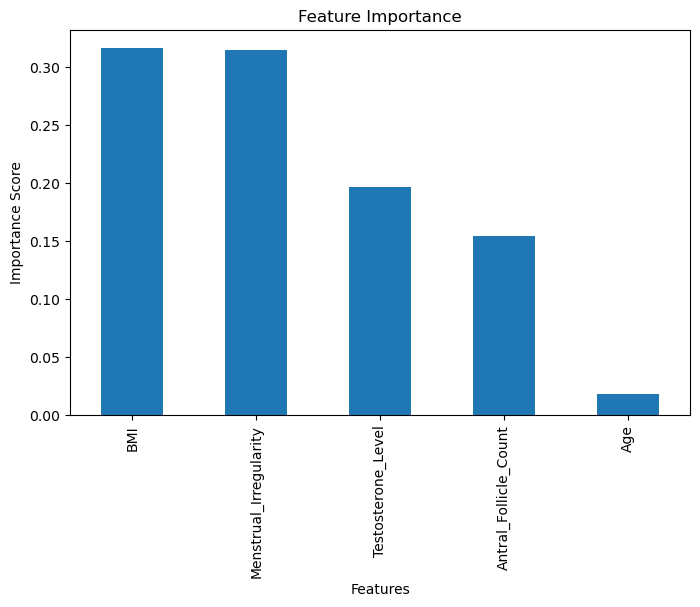

In [18]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(8, 5))
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# XGBoost

In [19]:
import xgboost as xgb

In [20]:
# Initialize the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



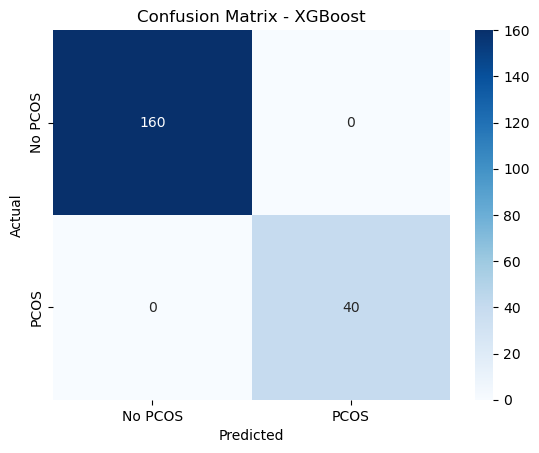

In [21]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# classification_report
print(classification_report(y_test, y_pred))

#conf matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No PCOS", "PCOS"], yticklabels=["No PCOS", "PCOS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

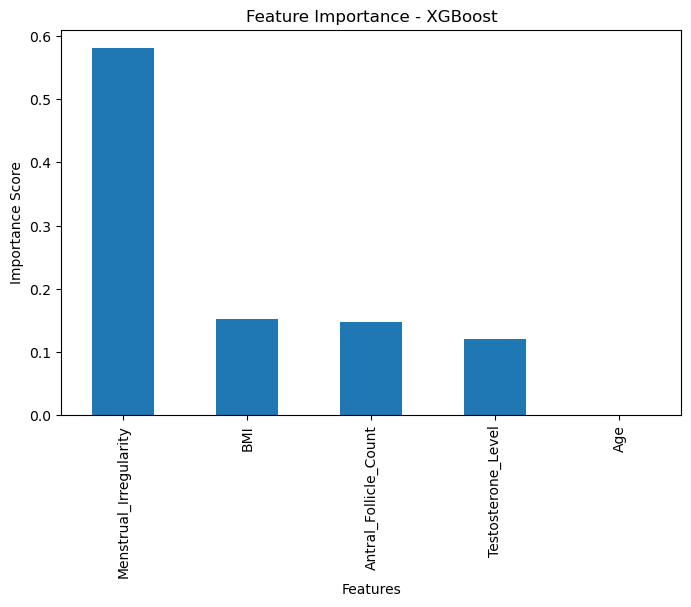

In [22]:
# feature importance analysis

feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(8, 5))
plt.title("Feature Importance - XGBoost")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [23]:
# checking for overfitting

# Training accuracy
train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 1.00


In [24]:
# cross validation

cv_scores = cross_val_score(xgb_model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-validation scores: [1.    1.    0.995 0.995 1.   ]
Mean CV Accuracy: 1.00


In [ ]:
# checking data leakage
# Compute correlation matrix
corr_matrix = df.corr()

# Sort correlations with the target variable (PCOS_Diagnosis)
corr_with_target = corr_matrix["PCOS_Diagnosis"].sort_values(ascending=False)
print(corr_with_target)

In [25]:
# Initialize XGBoost with regularization
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss',
    random_state=42,
    reg_alpha=0.1,  # L1 regularization (Lasso)
    reg_lambda=0.1   # L2 regularization (Ridge)
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)


In [26]:
# evaluating regularised model

# Training accuracy
train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Cross-validation accuracy
cv_scores = cross_val_score(xgb_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Training Accuracy: 1.00
Test Accuracy: 1.00
Cross-validation scores: [1.    1.    0.995 0.995 1.   ]
Mean CV Accuracy: 1.00


In [28]:
# lowering the no of tress (n_estimators)
# Initialize XGBoost with fewer trees
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss',
    random_state=42,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=0.1, # L2 regularization
    n_estimators=50  # Reduce number of trees (default is usually 100+)
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

In [29]:
# evaluating updated model
# Training accuracy
train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Cross-validation accuracy
cv_scores = cross_val_score(xgb_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Training Accuracy: 1.00
Test Accuracy: 1.00
Cross-validation scores: [1.    1.    0.995 0.995 1.   ]
Mean CV Accuracy: 1.00


summary from this analysis:
- the dataset is inherently easy to classify – Features provide strong separation between PCOS and non-PCOS cases.
- No overfitting issue – Since cross-validation scores match test accuracy, the model generalizes well.
- Regularization & reducing trees had little effect – The model already finds an optimal decision boundary with fewer trees.